In [1]:
#Pakete Laden
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

Datei einlesen, 
Anschließend mit Data Description abgleichen

In [2]:
#Rohdaten importieren
#Verzeichnis ggf. anpassen
Raw_Data = pd.read_csv('/home/studio-lab-user/sagemaker-studiolab-notebooks/Loan_status_2007-2020Q3.gzip',low_memory=False)
#gzip Datei kann trotzdem mit read csv eingelesen werden
#low_memory= false da Spalten gemixte Datentypen haben
num_columns_data = len(Raw_Data.columns)

#Data description importieren
#ggf. Verzeichnis anpassen
Data_Description = pd.read_excel('/home/studio-lab-user/sagemaker-studiolab-notebooks/Data Description Lending Club.xlsx')
num_rows_description = Data_Description.iloc[:, 0].count()

#Vergleich Anzahl Spaltenüberschriften im Datensatz und Reihen in Data Description
print ('Anzahl an Spalten im Datensatz ist die Gleiche wie Reihen in der Description: ',num_columns_data == num_rows_description)
print ('Anzahl an Spalten im Datensatz ist größer als Reihen in der Description: ',num_columns_data > num_rows_description)
print ('Anzahl Variablen im Datensatz:', num_columns_data)
print ('Anzahl Variablen in der Data Description:', num_rows_description)

Anzahl an Spalten im Datensatz ist die Gleiche wie Reihen in der Description:  False
Anzahl an Spalten im Datensatz ist größer als Reihen in der Description:  True
Anzahl Variablen im Datensatz: 142
Anzahl Variablen in der Data Description: 116


In [3]:
#Anzahl an Zeilen im Datensatz zählen
print("Anzahl an Beobachtungen: ", Raw_Data.shape[0])

Anzahl an Beobachtungen:  505458


Da 142 Spaltenüberschriften aus der Datendatei nicht mit 116 Reihen aus der Data Description übereinstimmen werden alle Spalten entfernt, die nicht in der Data Description sind

In [4]:
#Attribute aus Data und Description in einer Liste speichern
attribute_data = list(Raw_Data.columns)
attribute_description = Data_Description.iloc[:, 0].tolist()

#Ungleiche Einträge aus dem Datensatz in einer neuen Liste speichern
ungleiche_eintraege = [x for x in attribute_data if x not in attribute_description]

#Spalten entfernen die nicht in der Description enthalten sind
Raw_Data1 = Raw_Data.drop(columns=ungleiche_eintraege)
print('Anzahl Spalten: ',Raw_Data1.shape[1])

Anzahl Spalten:  110


Weitere Spalten entfernen die inhaltlich keinen Sinn ergeben

In [5]:
#Ausgewählte Spalten mit drop Funktion entfernen
spalten_sinnlos = ['grade',
                   'sub_grade',
                   'emp_title', 
                   'id', 
                   'issue_d',
                   'last_credit_pull_d',
                   'last_pymnt_d',
                   'policy_code',
                   'purpose',
                   'title',
                   'url',
                   'zip_code',
                   'earliest_cr_line',
                   'initial_list_status',
                   'int_rate',
                   'last_fico_range_high',
                   'last_fico_range_low',
                   'annual_inc_joint',
                   'collections_12_mths_ex_med',
                   'out_prncp',
                   'out_prncp_inv']
Raw_Data2 = Raw_Data1.drop(columns=spalten_sinnlos) 
print('Anzahl Spalten: ',Raw_Data2.shape[1]) #aktuelle Anzahl

Anzahl Spalten:  89


In [6]:
#Variablen entfernen die erst nach Kreditantrag kamen

spalten_drop = ['avg_cur_bal',
                'bc_util',
                'collection_recovery_fee',
                'funded_amnt',
                'funded_amnt_inv',
                'il_util',
                'last_pymnt_amnt',
                'max_bal_bc',
                'num_tl_120dpd_2m',
                'num_tl_30dpd',
                'num_tl_90g_dpd_24m',
                'num_tl_op_past_12m',
                'open_acc_6m',
                'open_il_12m',
                'open_il_24m',
                'open_rv_12m',
                'open_rv_24m',
                'recoveries',
                'tot_cur_bal',
                'total_acc',
                'total_bal_il',
                'total_pymnt',
                'total_pymnt_inv',
                'total_rec_int',
                'total_rec_late_fee',
                'total_rec_prncp']
Raw_Data2 = Raw_Data2.drop(columns=spalten_drop) 
print('Anzahl Spalten: ',Raw_Data2.shape[1]) #aktuelle Anzahl

Anzahl Spalten:  63


Nur Beobachtungen auswählen die schon abgeschlossen sind

In [7]:
#Variable loan_status in Variable mit zwei Beobachtungen umwandeln
# Alle Zeilen die nicht 'Fully_Paid' oder 'Charged_Off' haben werden entfernt

# Liste mit Attributen die entfernt werden sollen festlegen
unwanted_values = ['Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Current', 'Default']

# Zeilen filtern, die diese Werte nicht enthalten
Raw_Data2 = Raw_Data2[~Raw_Data2['loan_status'].isin(unwanted_values)]

Alle Spalten entfernen die zu viele NaN-Werte enthalten

In [8]:
#NaN Werte pro Spalte zählen
anzahl_nan= Raw_Data2.isna().sum()
#gesamt Beobachtung zählen
anzahl_zeilen = len(Raw_Data2)

#Anteil berechnen
anzahl_nan_df = pd.DataFrame({'Spalte': anzahl_nan.index, 'Anzahl_NaN': anzahl_nan.values})
anzahl_nan_df['anteil_nan'] = anzahl_nan_df.iloc[:, 1] /anzahl_zeilen

#Spalten mit mehr als 30% NaN herausfiltern
schwelle= 0.3
liste_nan = []
for index, row in anzahl_nan_df.iterrows():
    if row['anteil_nan'] > schwelle:
        liste_nan.append(row['Spalte'])

#Spalten entfernen
Raw_Data3 = Raw_Data2.drop(columns=liste_nan)
print('Anzahl Spalten nach NaN-Entfernung: ',Raw_Data3.shape[1])

#Alle Reihen die NaN Werte enthalten entfernen
#ggf entfernen
Raw_Data4 = Raw_Data3.dropna()
print('Anteil an entfernten Zeilen: ',((1-(Raw_Data4.shape[0]/Raw_Data3.shape[0]))*100),'%')


Anzahl Spalten nach NaN-Entfernung:  51
Anteil an entfernten Zeilen:  33.52081018607206 %


Unique Values analysieren

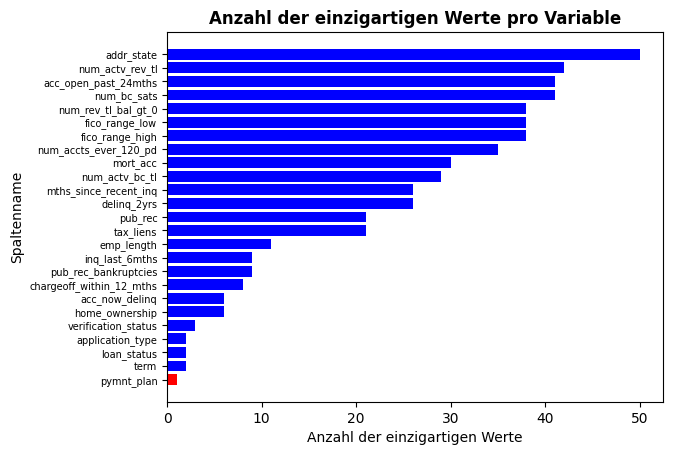

<Figure size 7000x3000 with 0 Axes>

In [9]:
# Neuen DataFrame für die eindeutigen Werte erstellen
unique_counts = pd.DataFrame(columns=['Spalte', 'Unique_Count'])

# Eindeutige Werte für jede Spalte zählen und in den neuen DataFrame speichern
for column in range(Raw_Data4.shape[1]):
    column_name = Raw_Data4.columns[column]
    unique_values = Raw_Data4.iloc[:, column].nunique()
    unique_counts = pd.concat([unique_counts, pd.DataFrame({'Spalte': [column_name], 'Unique_Count': [unique_values]})], ignore_index=True)

    
#Diagramm erstellen für Spalten mit weniger als 50 unique values
schwelle_uv = 50
uv50 = unique_counts.drop(unique_counts[unique_counts['Unique_Count'] > schwelle_uv].index)

# Werte in uv50 nach größe sortieren
uv50 = uv50 .sort_values(by='Unique_Count', ascending=True)

# Balkendiagramm erstellen
schwelle_farbe = 2  #Andere Farbe für Variablen die unter eine gewisse Schwelle fallen
plt.barh(uv50['Spalte'], uv50['Unique_Count'], color=['red' if value < schwelle_farbe else 'blue' for value in uv50['Unique_Count']])

# Achsenbeschriftungen und Überschrift hinzufügen
plt.xlabel('Anzahl der einzigartigen Werte')
plt.ylabel('Spaltenname')
plt.yticks(fontsize=7)
plt.title('Anzahl der einzigartigen Werte pro Variable', fontweight='bold')
plt.figure(figsize=(70,30))

#Diagramm speichern
plt.tight_layout()
#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/diagramm_uv.jpg')

plt.show()

In [10]:
#Spalten mit nur einem Unique Value entfernen
spaltenname_uv = [] #leere Liste erstellen

#Variablen in Schleife hinzufügen die unter Schwelle liegen
for index, row in unique_counts.iterrows():
    if row['Unique_Count'] < schwelle_farbe:
        spaltenname_uv.append(row['Spalte'])

#Spalten mit nur einem UV anahnd von Liste entfernen
Raw_Data5 = Raw_Data4.drop(columns=spaltenname_uv) 
print('Anzahl Spalten: ',Raw_Data5.shape[1])


Anzahl Spalten:  50


Spalteneinträge transformieren und korrigieren

In [11]:
#Prozentzeichen entfernen
#revol_util Prozent Zeichen entfernen und Datentyp ändern
Raw_Data5['revol_util'] = Raw_Data5['revol_util'].str.replace('%', '')
Raw_Data5['revol_util'] = Raw_Data5['revol_util'].astype(float)

In [12]:
#Beobachtung 'none' und 'any' in Spalte Variable home_ownership in 'other' transformieren
Raw_Data5['home_ownership'] = Raw_Data5['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [13]:
#fico_range durchschnitt erstellen
# Mittelwert der beiden Spalten für jede Zeile berechnen
Raw_Data5['fico_average'] = (Raw_Data5['fico_range_high'] + Raw_Data5['fico_range_low']) / 2

# Alten Spalten entfernen
Raw_Data5 = Raw_Data5.drop(columns=['fico_range_high', 'fico_range_low'])


Datenübersicht/ Statistik aufstellen

In [14]:
#zuerst nummerische und kategorische Variablen trennen
kategorische_variablen = ['addr_state', 'emp_length', 'home_ownership','loan_status', 'verification_status','term','application_type']
numerical_data = Raw_Data5.drop(columns=kategorische_variablen)

In [15]:
#Datenübersicht für kategorische Variablen erstellen

#Schleife über jede Spalte
#Dataframes mit Häufigkeiten erstellen
for spalte in kategorische_variablen:
    #Häufigkeiten zählen und in Series speichern
    häufigkeiten = Raw_Data5[spalte].value_counts()
    #Series in DataFrame konvertieren
    df_häufigkeiten = häufigkeiten.reset_index()
    #Spaltenüberschriften umbennen
    df_häufigkeiten = df_häufigkeiten.rename(columns={spalte: 'Variable'})
    #DataFrame als globale Variable mit Spaltennamen speichern
    globals()[spalte] = df_häufigkeiten


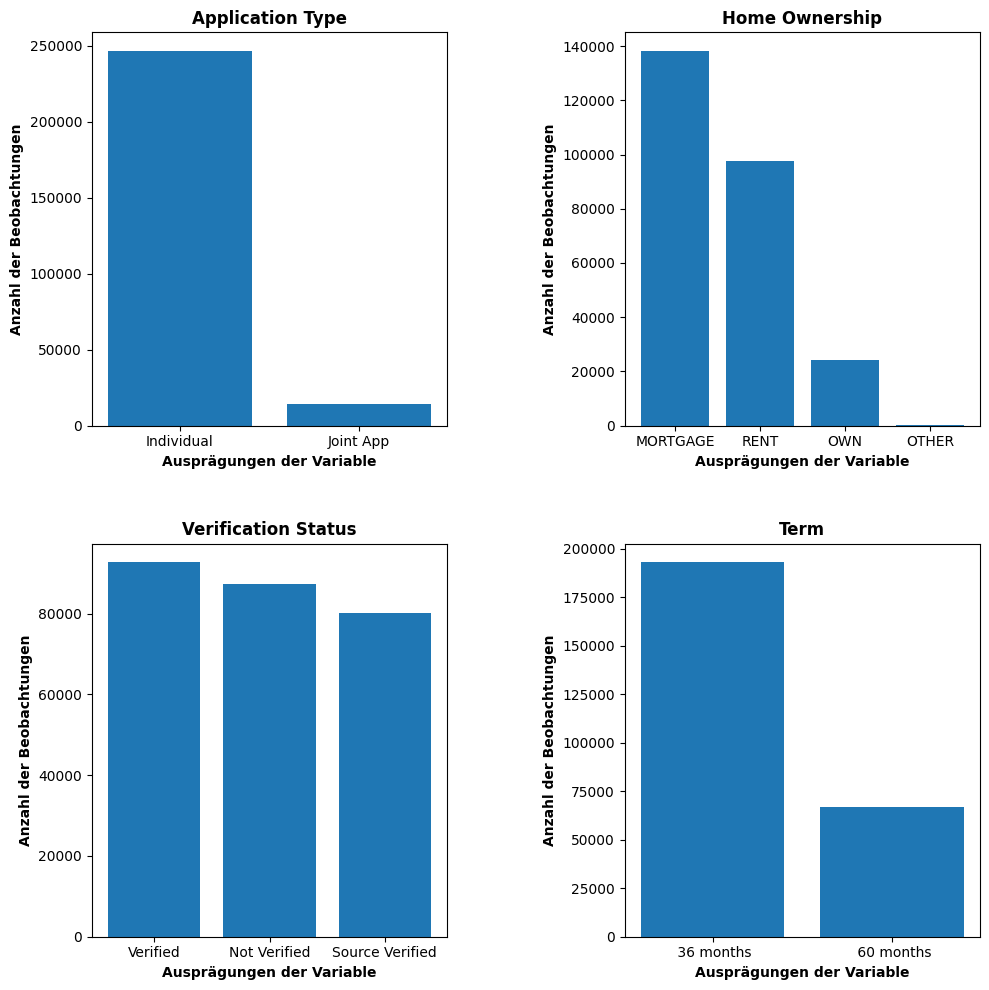

In [16]:
# kleine Bakendiagramme erstellen
bar_variables = [application_type, home_ownership, verification_status,term]
bar_names = ['Application Type', 'Home Ownership', 'Verification Status','Term'] #Liste mit Diagrammüberschriften

#4 Balkeniagramme in einer Figure darstellen
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10)) #Größe anpassen

#Diagramm erstellen und Überschrift und Axenbeschriftung festlegen
for i, (df, ax) in enumerate(zip(bar_variables, axes.flatten())):
    ax.bar(df['Variable'], df['count'])
    ax.set_title(bar_names[i], fontweight='bold')
    ax.set_ylabel('Anzahl der Beobachtungen', fontweight='bold')
    ax.set_xlabel('Ausprägungen der Variable', fontweight='bold')

plt.tight_layout()  #Layout anpassen
plt.subplots_adjust(hspace=0.3,wspace=0.5) #Abstand der Plots festlegen
#Plot speichern
#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/category_bar1.jpg')
plt.show()

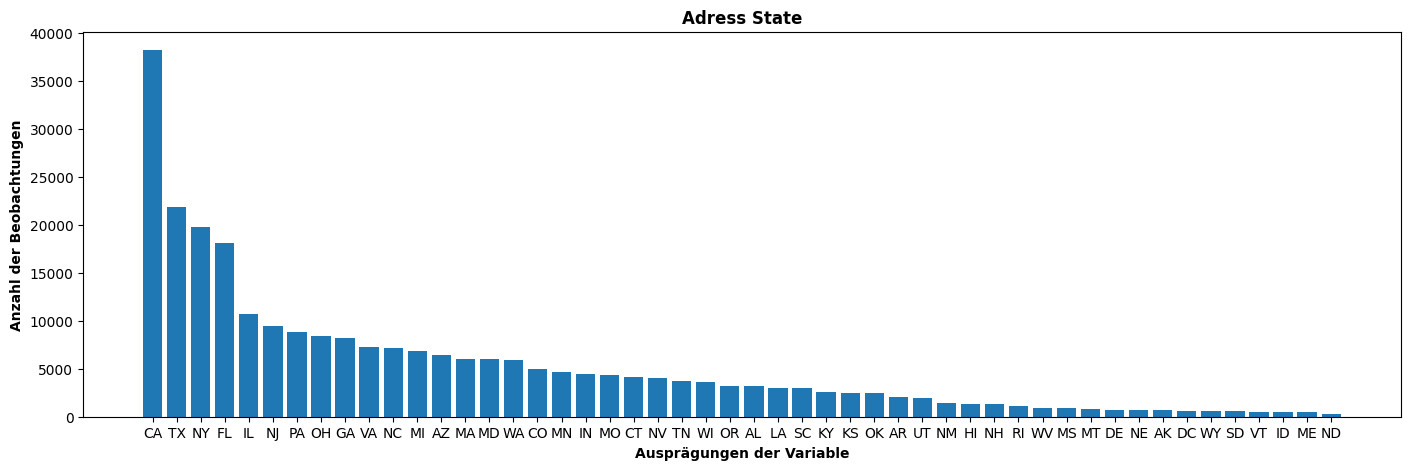

In [17]:
#Balkendiagramm addr_state erstellen
fig, axs = plt.subplots( figsize=(17, 5))
axs.bar(addr_state['Variable'], addr_state['count'])
axs.set_title('Adress State', fontweight='bold') #Überschrift festlegen
#Achsenbeschriftung festlegen
axs.set_ylabel('Anzahl der Beobachtungen', fontweight='bold')
axs.set_xlabel('Ausprägungen der Variable', fontweight='bold')

#Plot speichern
#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/category_bar2.jpg')
plt.show()

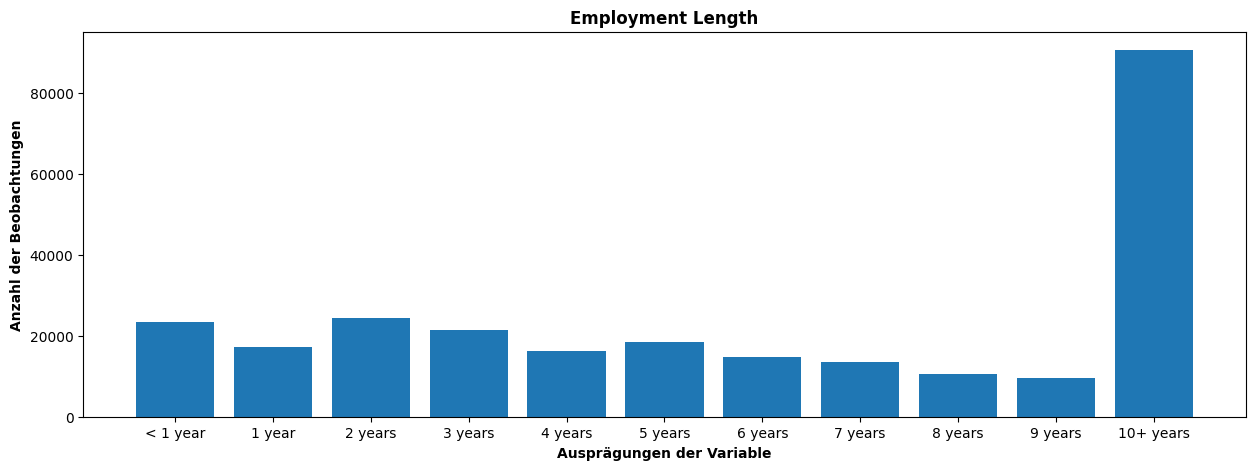

In [18]:
#sortiertes Balkendiagramm für emp_length erstellen

#Sortierung festlegen
sortierung_emp_length = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years' ]
emp_length['Variable'] = pd.Categorical(emp_length['Variable'], categories=sortierung_emp_length, ordered=True)
emp_length = emp_length.sort_values('Variable')


#figure erstellen
#größe, überschrift und achsenbeschriftung festlegen
fig, axs = plt.subplots(figsize=(15, 5))
axs.bar(emp_length['Variable'], emp_length['count'])
axs.set_title('Employment Length', fontweight='bold')
axs.set_ylabel('Anzahl der Beobachtungen', fontweight='bold')
axs.set_xlabel('Ausprägungen der Variable', fontweight='bold')

#plot speichern
#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/category_bar3.jpg')
plt.show()

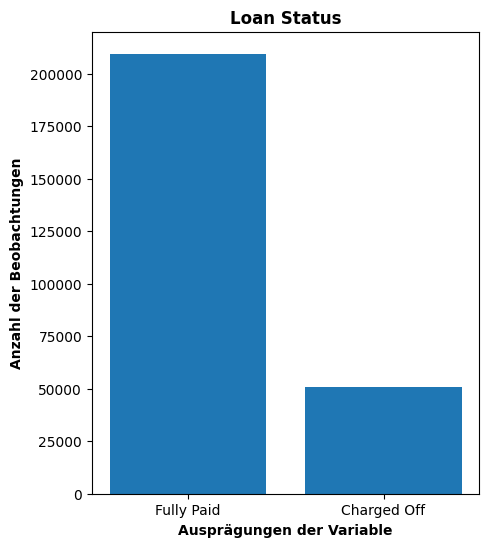

In [19]:
#Balkendiagramm für loan_status erstellen

#Figure erstellen und Überschrift und Achsenebschriftung festlegen
fig, axs = plt.subplots(figsize=(5, 6))
axs.bar(loan_status['Variable'], loan_status['count'])
axs.set_title('Loan Status', fontweight='bold')
axs.set_ylabel('Anzahl der Beobachtungen', fontweight='bold')
axs.set_xlabel('Ausprägungen der Variable', fontweight='bold')

#Plot speichern 
#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/category_bar4.jpg')

plt.show()

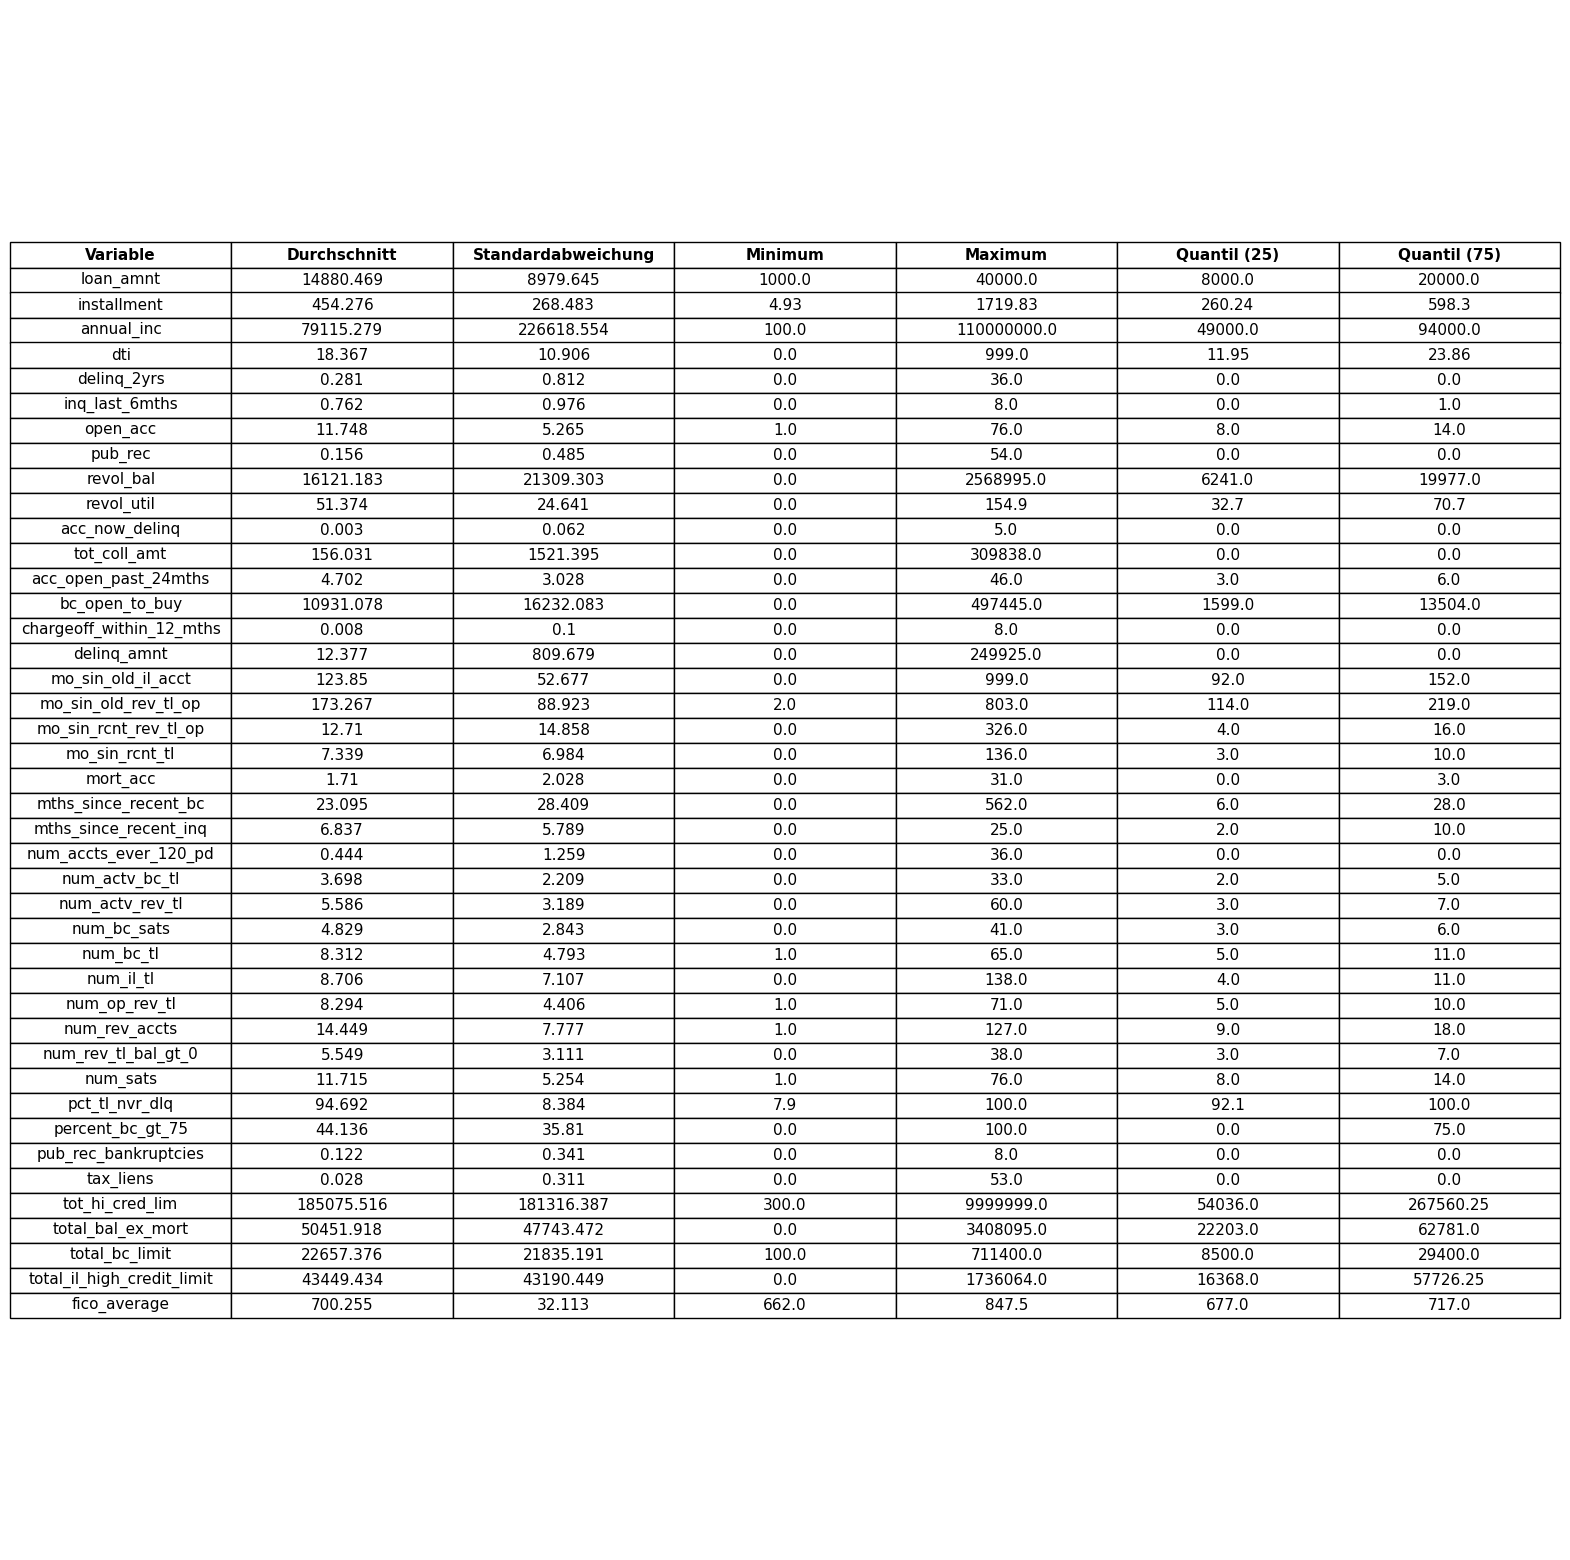

In [20]:
#Datenübersicht für nummerische Variablen
#leeren Dataframe erstellen
datenstatistik = pd.DataFrame(columns = ['Variable', 'Durchschnitt', 'Standardabweichung', 'Minimum', 'Maximum', 'Quantil (25)', 'Quantil (75)'])

#Spalten füllen
#Variablenname übernehmen
datenstatistik['Variable'] = numerical_data.columns

#Durchschnitt berechnen
mean_series =round(numerical_data.mean(),3)
mean_list = mean_series.tolist()
datenstatistik['Durchschnitt'] = mean_list

#Standartabweichung berechnen
std_series =round(numerical_data.std(),3)
std_list = std_series.tolist()
datenstatistik['Standardabweichung'] = std_list

#Minimum berechnen
min_series = numerical_data.min()
min_list = min_series.tolist()
datenstatistik['Minimum'] = min_list

#Maximum berechnen
max_series = round(numerical_data.max(),3)
max_list = max_series.tolist()
datenstatistik['Maximum'] = max_list
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Anzeige von großen Zahlen ändern

#Quantil (25) berechnen
quartil_series = round(numerical_data.quantile(0.25),3)
quartil_list = quartil_series.tolist()
datenstatistik['Quantil (25)'] = quartil_list

#Quantil (75) berechnen
quartil3_series = round(numerical_data.quantile(0.75),3)
quartil3_list = quartil3_series.tolist()
datenstatistik['Quantil (75)'] = quartil3_list


fig, ax = plt.subplots(figsize=(20, 20))
ax.axis('off')  # Deaktiviere die Achsenbeschriftungen
table = ax.table(cellText=datenstatistik.values, colLabels=datenstatistik.columns, loc='center', cellLoc='center')

# Die erste Zeile fett drucken 
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Wenn es die erste Zeile ist
        cell.set_text_props(fontweight='bold')
        

# Schriftgröße und Zeilenabstand anpassen
table.auto_set_font_size(False)  # Deaktiviere automatische Schriftgrößenanpassung
table.set_fontsize(11)  # Setze Schriftgröße auf 10
table.scale(1, 1.5)  # Vergrößere den Zeilenabstand


#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/statistik.jpg')
plt.show()

Boxplot erstellen für alle nummerischen Variablen

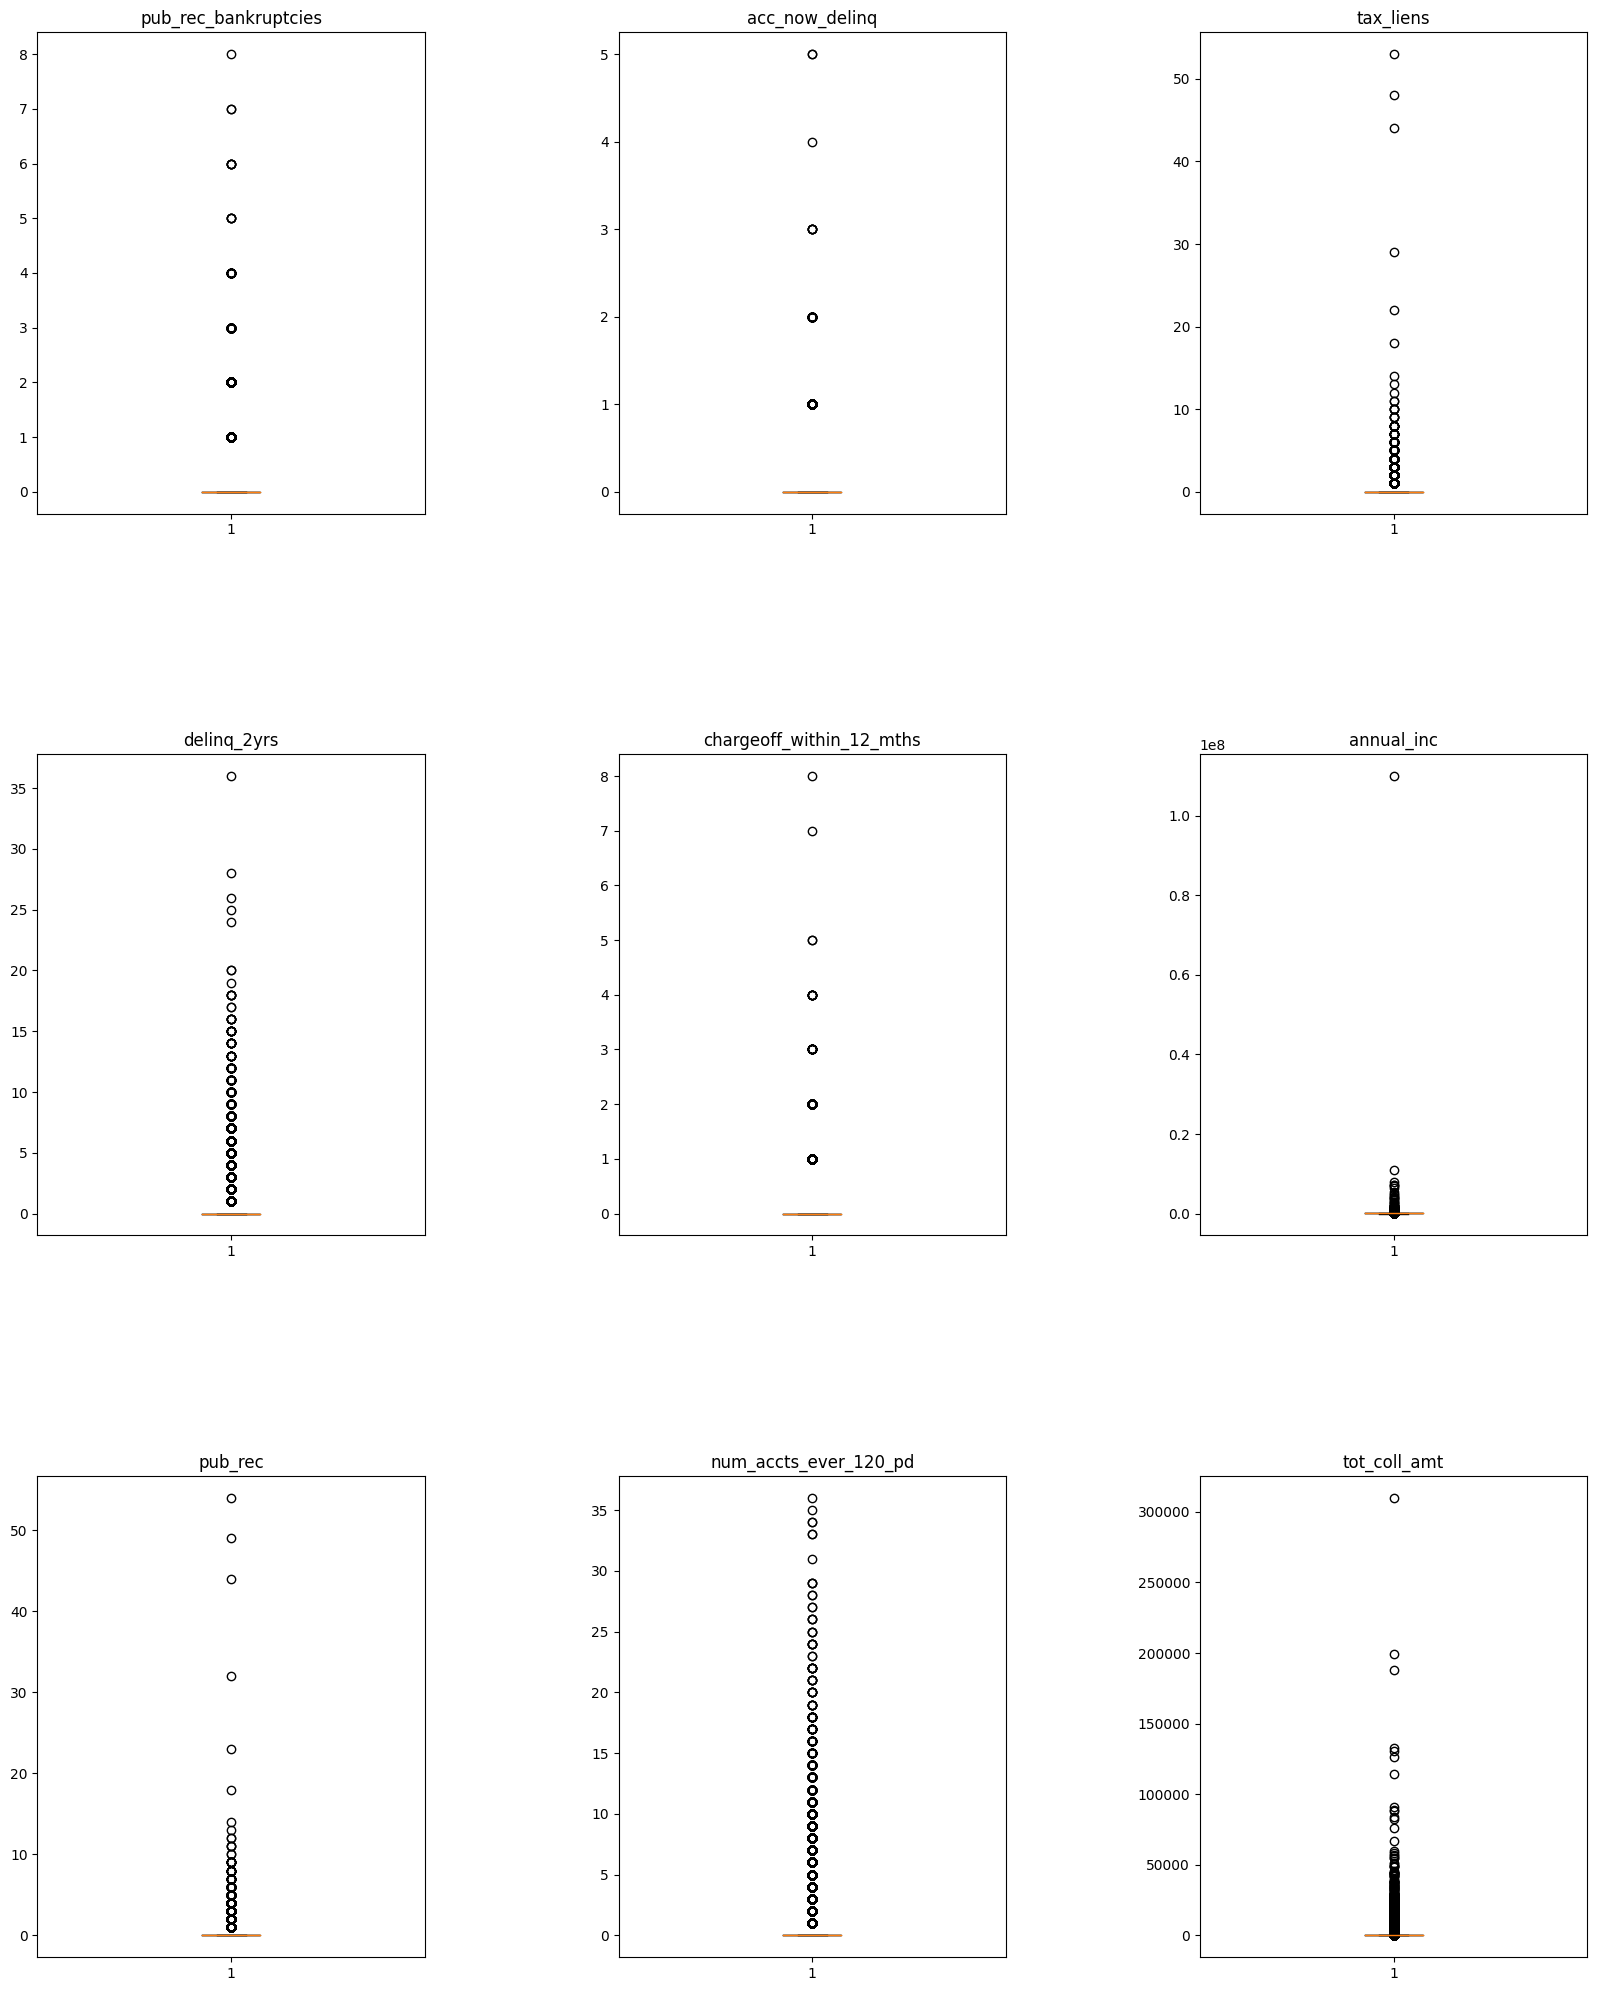

In [21]:
#zunächst Variablen die wenige Beobachtungen ungleich null haben
#macht keinen Sinn Outlier zu entfernen

#Spaltennamen in einer Liste sammeln
columns = ['pub_rec_bankruptcies', 
           'delinq_2yrs', 'pub_rec', 
           'acc_now_delinq', 
           'chargeoff_within_12_mths', 
           'num_accts_ever_120_pd', 
           'tax_liens',
           'annual_inc',
           'tot_coll_amt',]

#Spalten extrahieren
outlier_detec1 = numerical_data[columns]



# Größe und Layout von Subplots festlegen
fig, axs = plt.subplots(3, 3, figsize=(20, 25))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# # Schleife zur Boxploterstellung über Spalten
for i, spalte in enumerate(outlier_detec1.columns):
    axs[i%3, i//3].boxplot(outlier_detec1[spalte])
    axs[i%3, i//3].set_title(spalte)  # Spaltenüberschrift festlegen

# Diagramm anzeigen
#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/outlier_boxplot1.jpg')
plt.show()


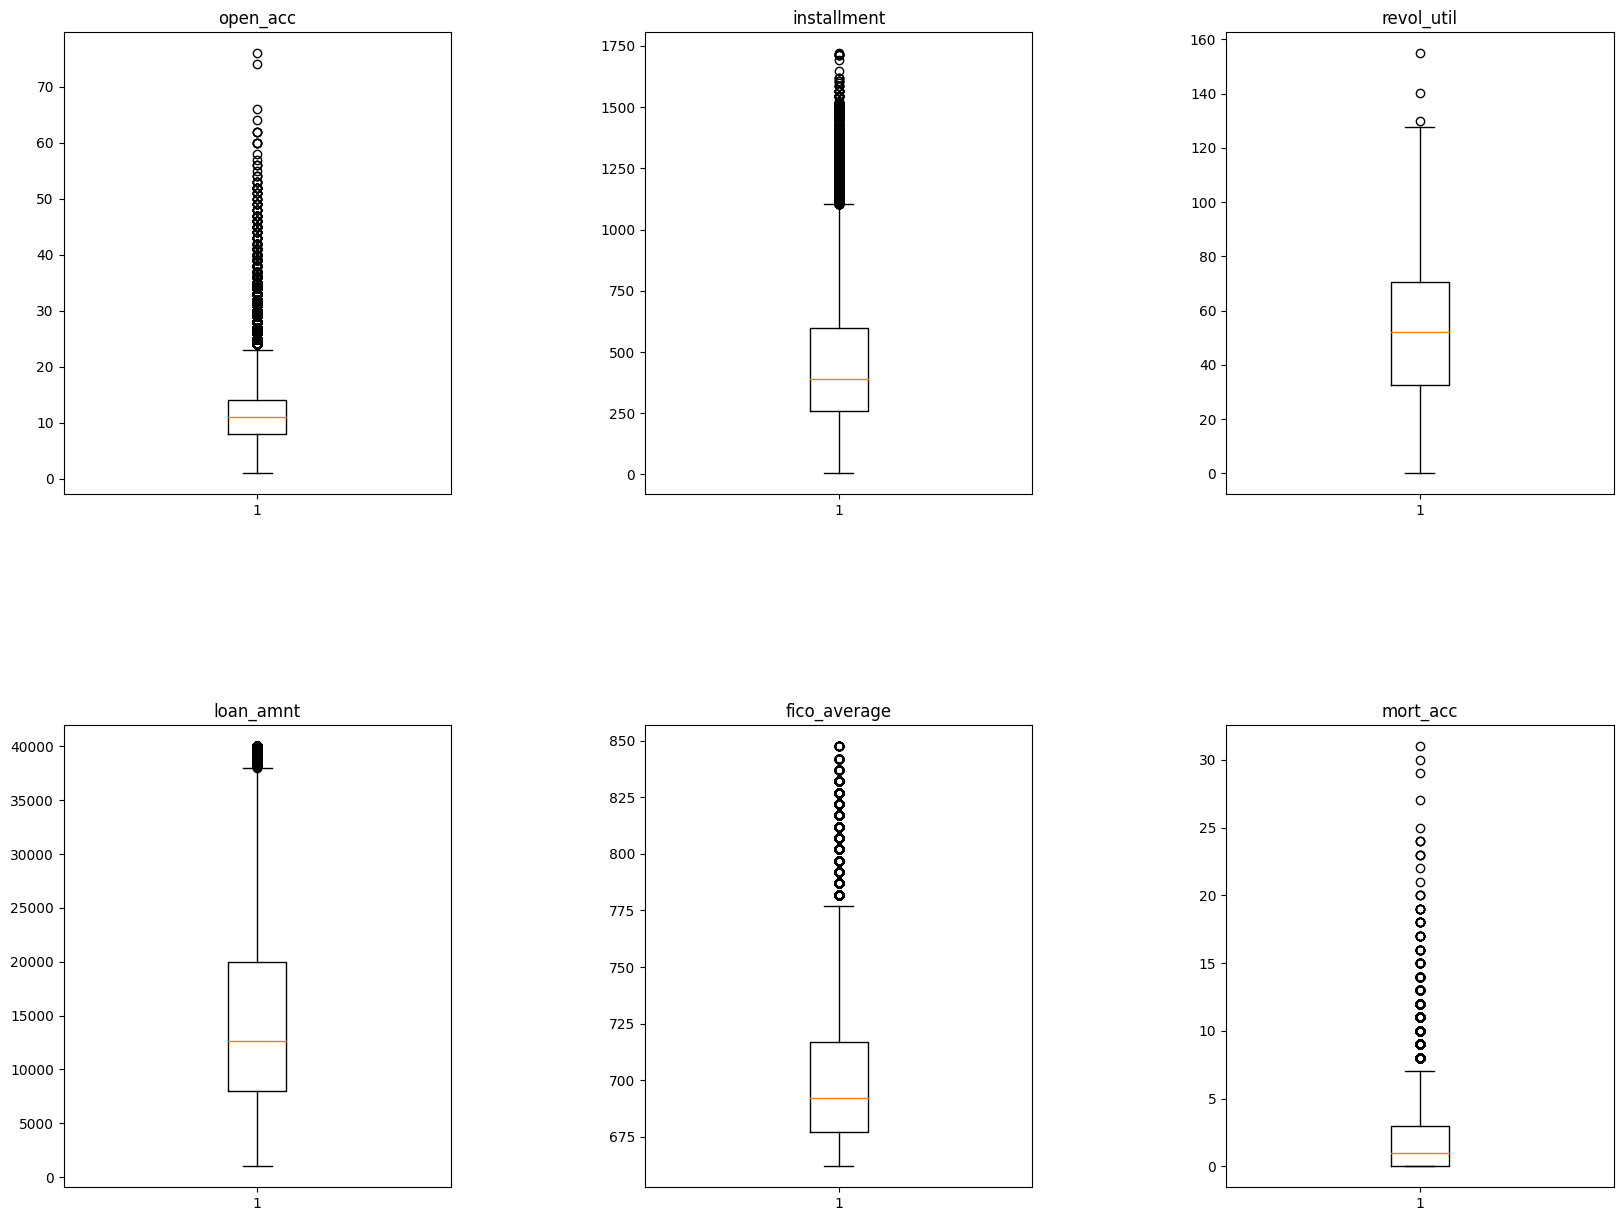

In [22]:
#weitere Boxplots
#Spaltennamen in eine Liste hinzufügen
columns2 = ['open_acc', 
            'loan_amnt', 
            'installment', 
            'fico_average', 
            'revol_util',
            'mort_acc']

#Spalten extrahieren
outlier_detec2 = numerical_data[columns2]

# Größe und Layout von Subplots festlegen
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# # Schleife zur Boxploterstellung über Spalten
for i, spalte in enumerate(outlier_detec2.columns):
    axs[i%2, i//2].boxplot(outlier_detec2[spalte])
    axs[i%2, i//2].set_title(spalte)  # Spaltenüberschrift festlegen

# Diagramm anzeigen
#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/outlier_boxplot2.jpg')
plt.show()

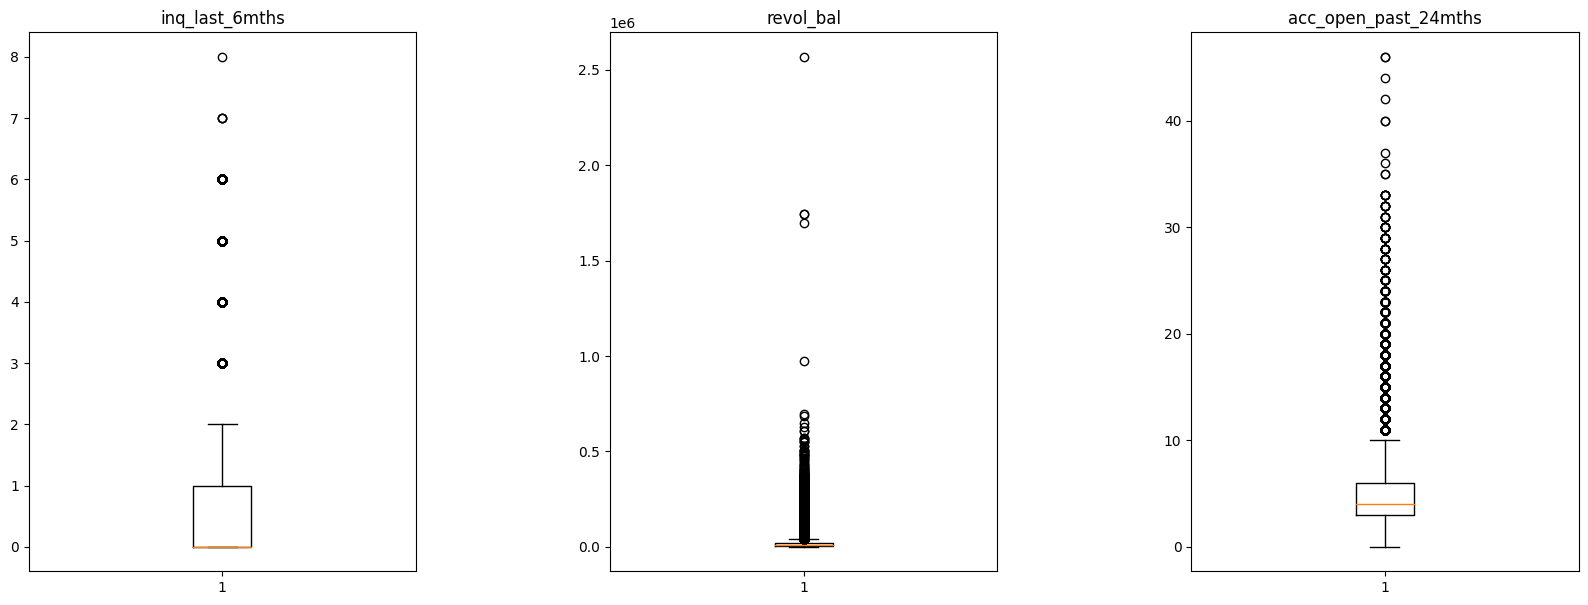

In [23]:
#weitere Boxplots die nicht so aussagekräftig sind 1/3
#eher für den Anhang und zur Vollständigkeit gedacht
columns3 = ['inq_last_6mths', 
            'revol_bal',  
            'acc_open_past_24mths']

outlier_detec3 = numerical_data[columns3]


# Größe und Layout von Subplots festlegen
fig, axs = plt.subplots(1, 3, figsize=(20, 7))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Schleife zur Boxploterstellung über Spalten
for i, spalte in enumerate(outlier_detec3.columns):
    axs[i].boxplot(outlier_detec3[spalte])
    axs[i].set_title(spalte)  # Spaltenüberschrift festlegen

# Diagramm anzeigen
#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/outlier_boxplot3.jpg')
plt.show()

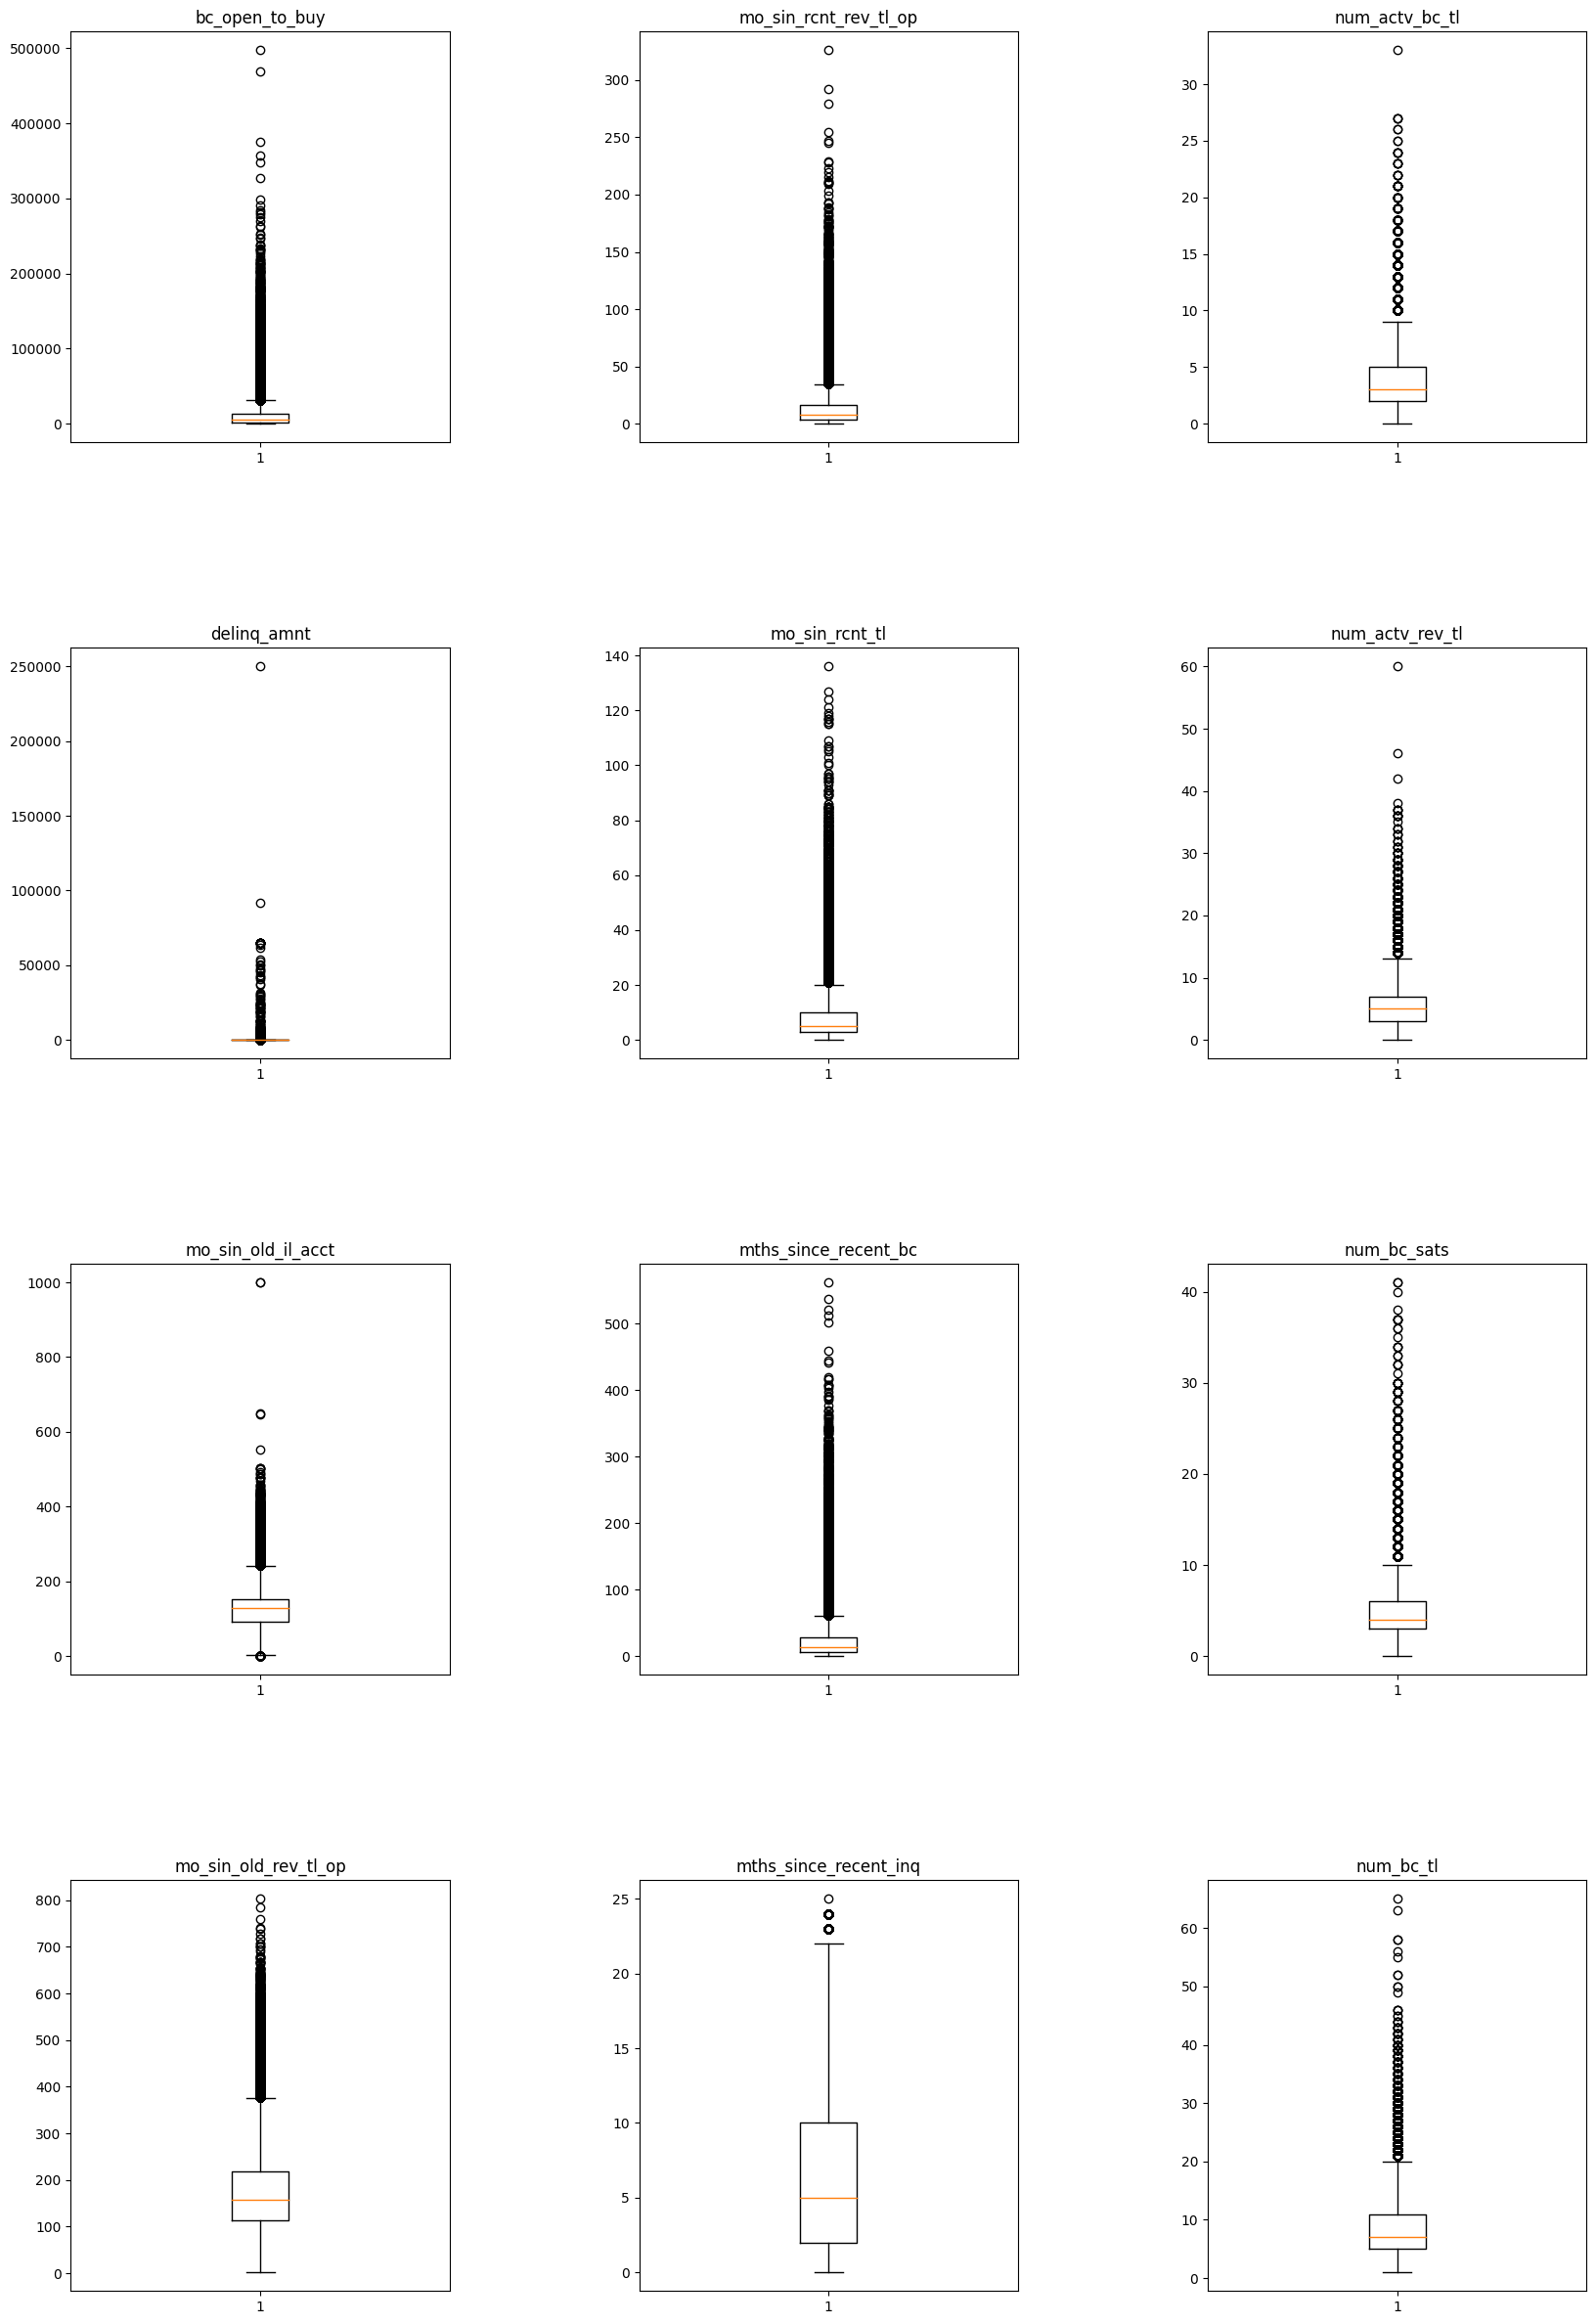

In [24]:
#weitere Boxplots die nicht so aussagekräftig sind 2/3
#eher für den Anhang und zur Vollständigkeit gedacht
columns4 = ['bc_open_to_buy',
            'delinq_amnt',
            'mo_sin_old_il_acct',
            'mo_sin_old_rev_tl_op',
            'mo_sin_rcnt_rev_tl_op',
            'mo_sin_rcnt_tl', 
            'mths_since_recent_bc',
            'mths_since_recent_inq',
            'num_actv_bc_tl',
            'num_actv_rev_tl',
            'num_bc_sats',
            'num_bc_tl']

outlier_detec4 = numerical_data[columns4]


# Größe und Layout von Subplots festlegen
fig, axs = plt.subplots(4, 3, figsize=(20, 30))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Schleife zur Boxploterstellung über Spalten
for i, spalte in enumerate(outlier_detec4.columns):
    axs[i%4, i//4].boxplot(outlier_detec4[spalte])
    axs[i%4, i//4].set_title(spalte)  # Spaltenüberschrift festlegen

# Diagramm anzeigen
#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/outlier_boxplot4.jpg')
plt.show()

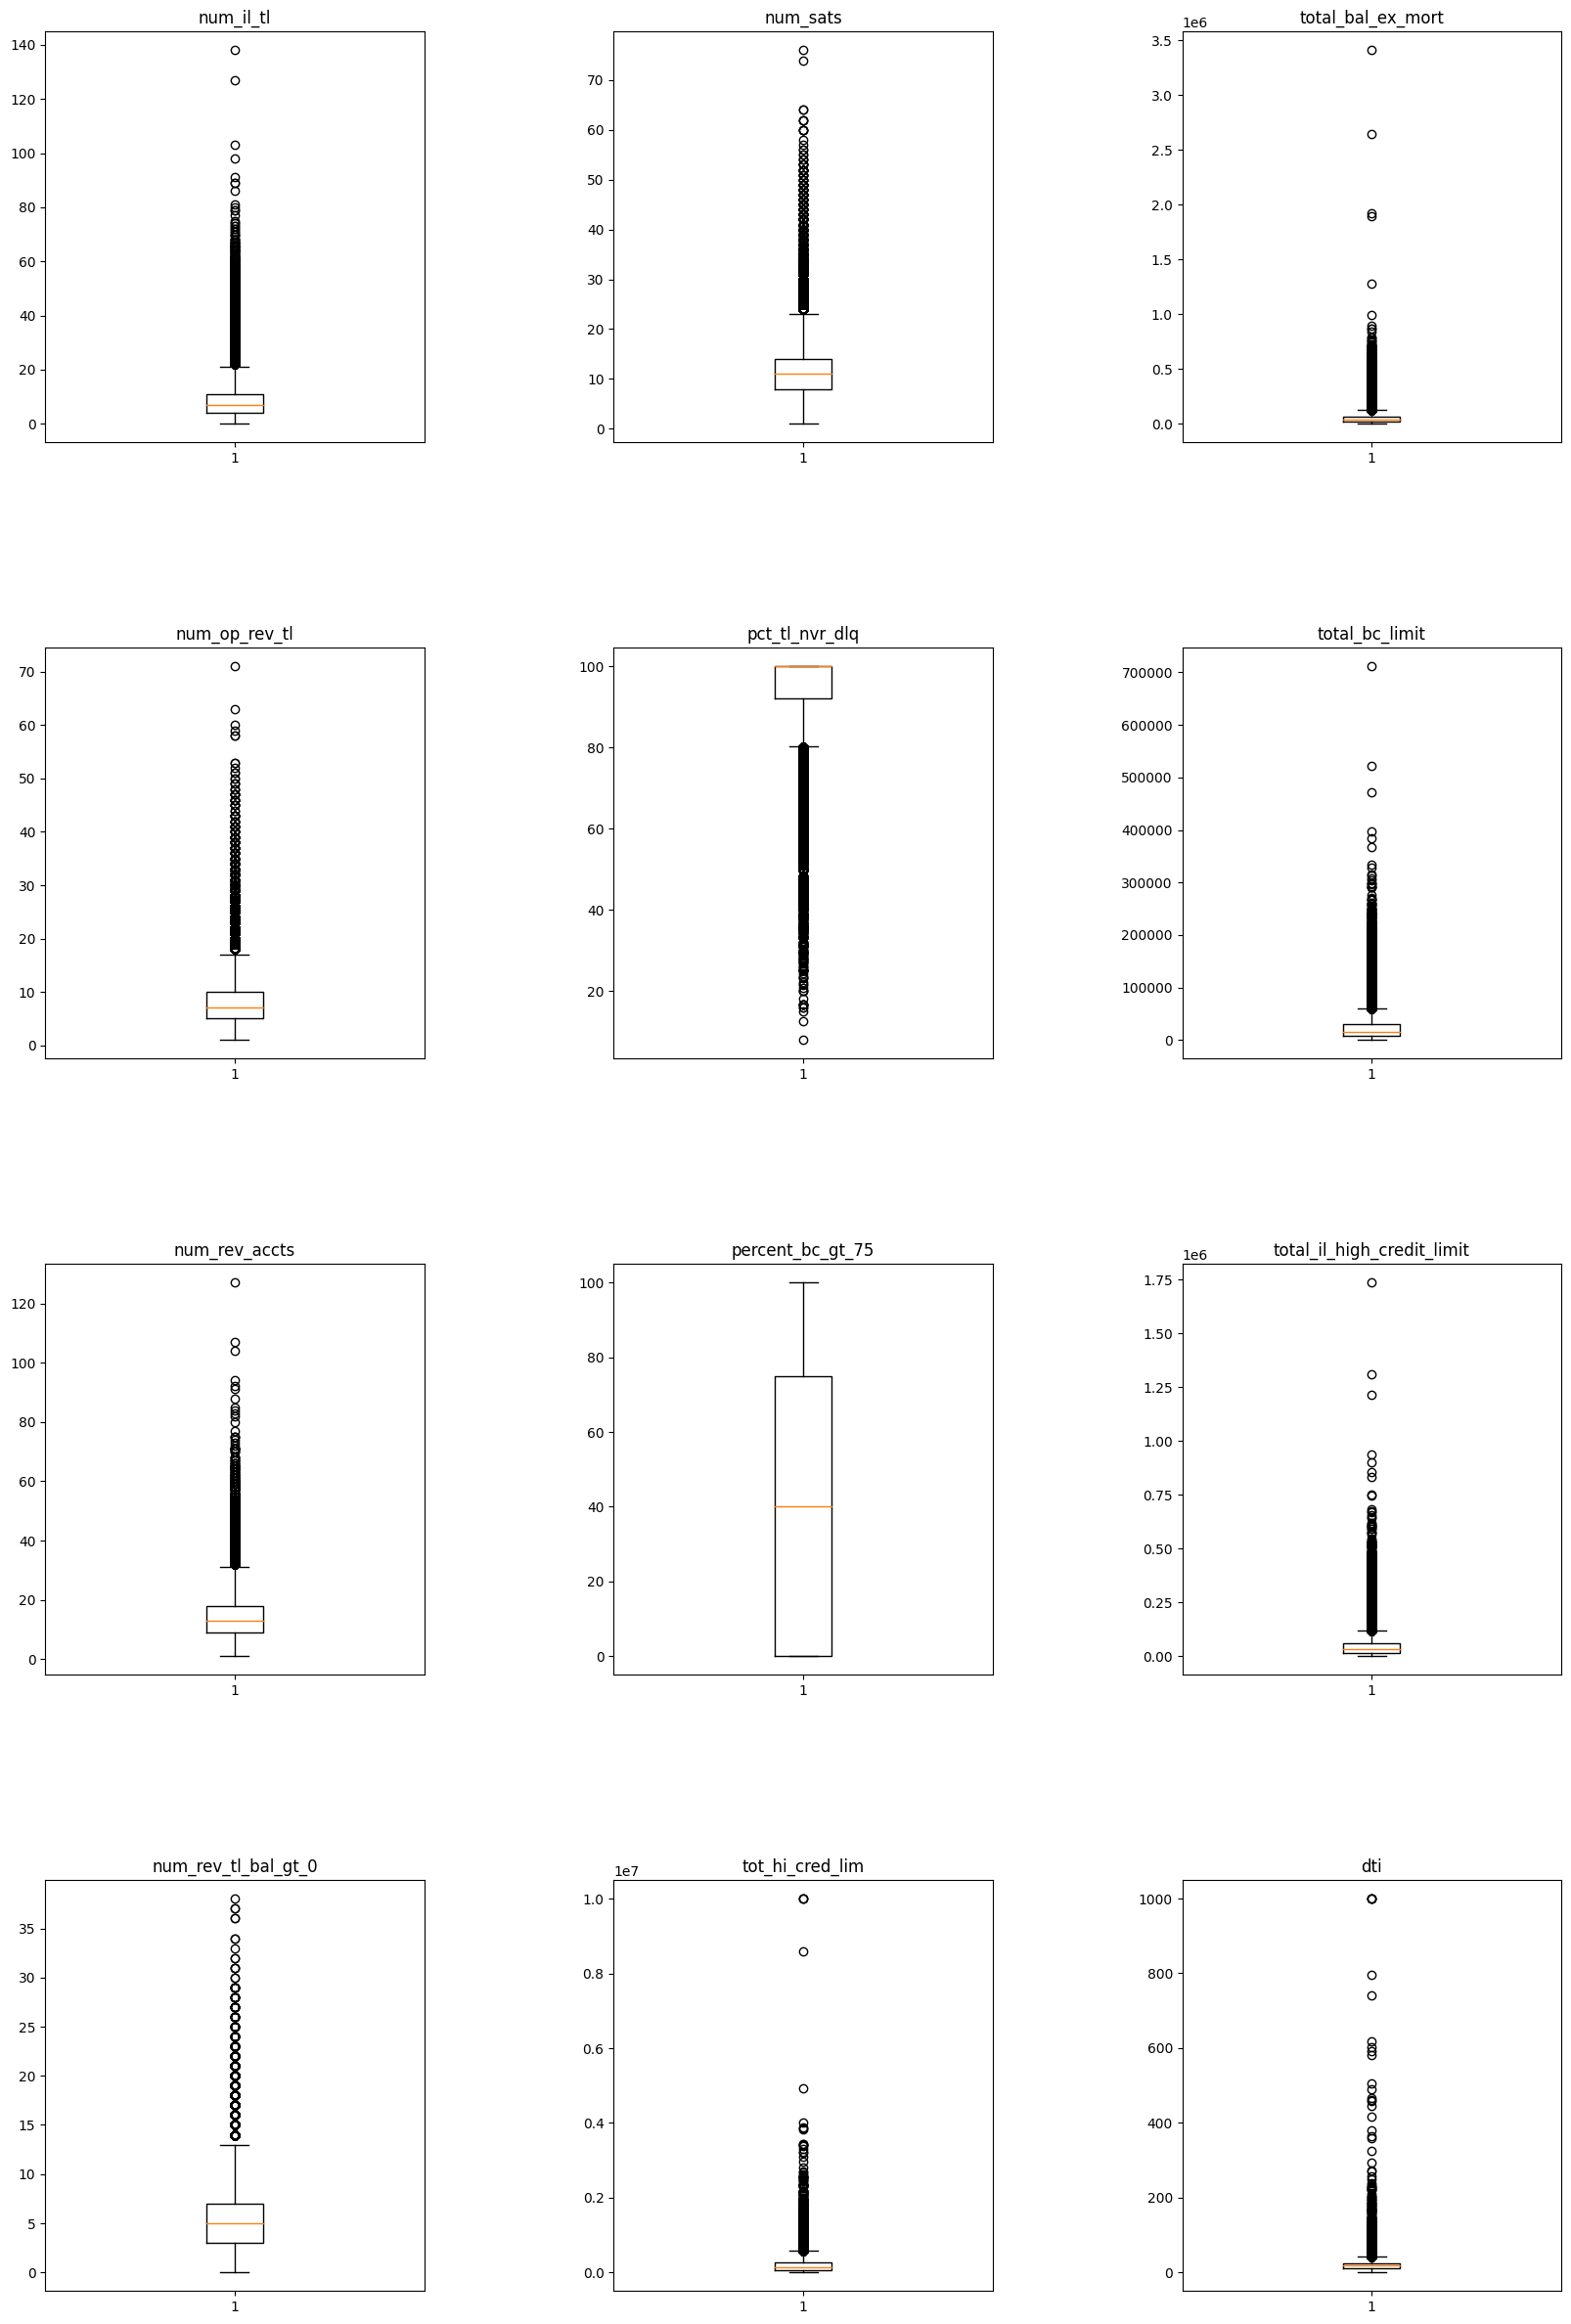

In [25]:
#weitere Boxplots die nicht so aussagekräftig sind 3/3
#eher für den Anhang und zur Vollständigkeit gedacht
columns5 = ['num_il_tl',
            'num_op_rev_tl',
            'num_rev_accts',
            'num_rev_tl_bal_gt_0',
            'num_sats',
            'pct_tl_nvr_dlq',
            'percent_bc_gt_75',
            'tot_hi_cred_lim',
            'total_bal_ex_mort',
            'total_bc_limit',
            'total_il_high_credit_limit',
            'dti']

outlier_detec5 = numerical_data[columns5]


# Größe und Layout von Subplots festlegen
fig, axs = plt.subplots(4, 3, figsize=(20, 30))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Schleife zur Boxploterstellung über Spalten
for i, spalte in enumerate(outlier_detec5.columns):
    axs[i%4, i//4].boxplot(outlier_detec5[spalte])
    axs[i%4, i//4].set_title(spalte)  # Spaltenüberschrift festlegen

# Diagramm anzeigen
#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/outlier_boxplot5.jpg')
plt.show()

In [26]:
#Übersicht über neue Spalten und Zeilen Anzahl

print('Anzahl an Zeilen/ Beobachtungen nach Data Cleaning: ', Raw_Data5.shape[0])
print('Anzahl an Spaltn/ Variablen nach Data Cleaning: ', Raw_Data5.shape[1]) 

#Raw_Data5.columns

Anzahl an Zeilen/ Beobachtungen nach Data Cleaning:  260276
Anzahl an Spaltn/ Variablen nach Data Cleaning:  49


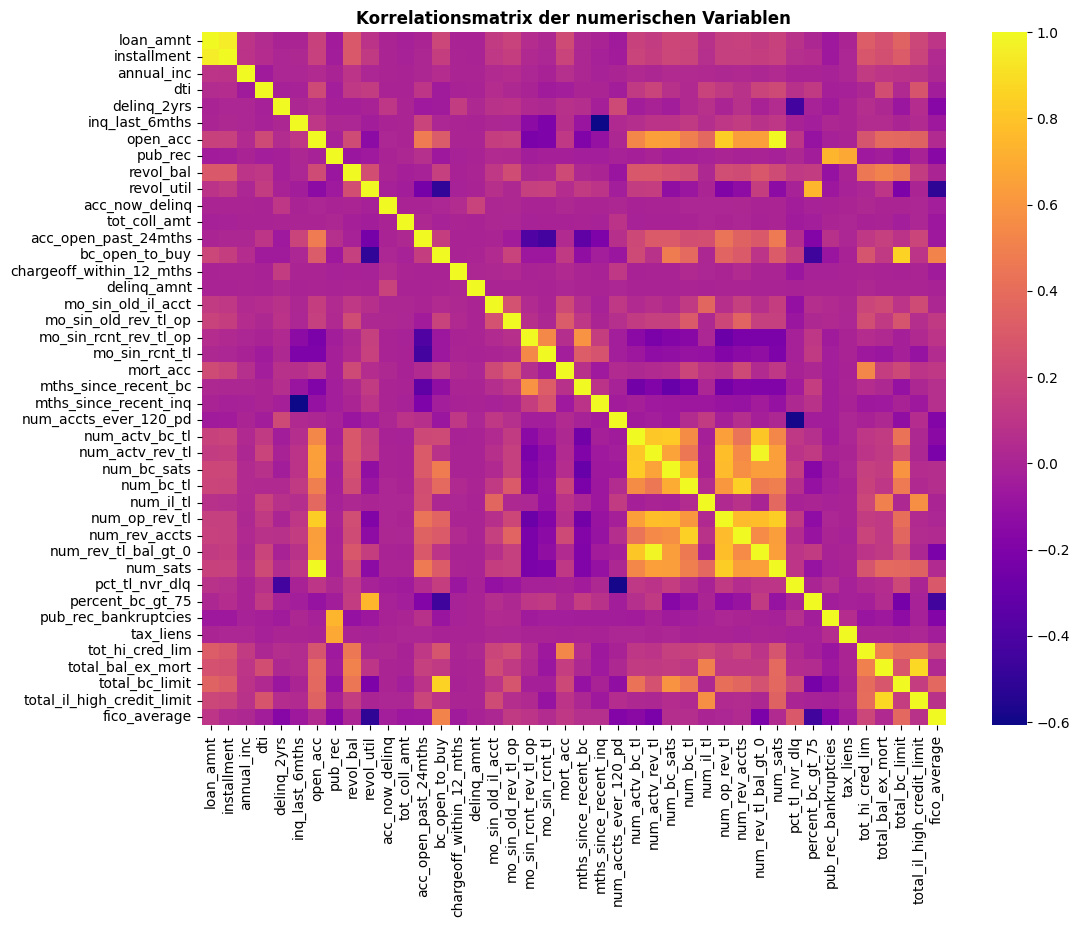

In [27]:
#Korrelation zwischen nummerischen Variablen untersuchen
#nummerische Daten wurden bereits getrennt und in numerical_data gespeichert

#Berechnung der Korrelationsmatrix
correlation_matrix = numerical_data.corr()

# Heatmap erstellen
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, cmap='plasma')
plt.title("Korrelationsmatrix der numerischen Variablen",  fontweight='bold')
# Diagramm anzeigen
#plt.savefig('/home/studio-lab-user/sagemaker-studiolab-notebooks/heatmap.jpg')
plt.show()


### **Variablen umkodieren**


In [32]:
#Alten Dataframe kopieren
LC_Data = Raw_Data5.copy()

#binäre Variable aus loan_status machen
LC_Data['loan_status'] = LC_Data['loan_status'].replace(LC_Data['loan_status'].unique(), list(range(2)))

#binäre Variable aus application_type machen
LC_Data['application_type'] = LC_Data['application_type'].replace(LC_Data['application_type'].unique(), list(range(2)))

#binäre Variable aus 'term' machen
LC_Data['term'] = LC_Data['term'].replace(LC_Data['term'].unique(), list(range(2)))

#Variable 'emp_length' nach sortierten Intervallen umkodieren
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
ordinal_encoder = OrdinalEncoder(categories=[emp_length_order])
LC_Data[['emp_length']] = ordinal_encoder.fit_transform(LC_Data[['emp_length']])

#binäre Variable aus Verification Status machen
#Variable hat Ausprägung 1 wenn Einkommen verifiziert ist
LC_Data['verification_status'] = LC_Data['verification_status'].replace({'Verified': 1, 'Source Verified': 1})
LC_Data['verification_status'] = LC_Data['verification_status'].replace({'Not Verified': 0})

#Adress State in binäre Variable umwandeln
#CA hat Ausprägung 1
LC_Data['addr_state'] = (LC_Data['addr_state'] == 'CA').astype(int)

#Home Ownership in binäre Variable umwandeln
LC_Data['home_ownership'] = LC_Data['home_ownership'].replace({'OWN': 1, 'MORTGAGE': 1})
LC_Data['home_ownership'] = LC_Data['home_ownership'].replace({'RENT': 0, 'OTHER': 0})


#neue Version von Panda kodiert kategorische Spalten in boolesche Werte
#Spalten von True/False in 1 und 0 ändern
LC_Data = LC_Data * 1

# Datensatz als CSV exportieren
#LC_Data.to_csv('/home/studio-lab-user/sagemaker-studiolab-notebooks/LC_Data_Clean.csv', index=False)